In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

Problem (2) KNN:-

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
target = data['Outcome']

In [7]:
features = data.drop(['Outcome'],axis=1)

In [8]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size=0.3,random_state=3)

In [11]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
    x_train[col] = (x_train[col] - x_train[col].min()) / (x_train[col].max() - x_train[col].min())

In [12]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
    x_test[col] = (x_test[col] - x_test[col].min()) / (x_test[col].max() - x_test[col].min())

In [13]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
601,0.400000,0.484848,0.000000,0.000000,0.000000,0.398990,0.047822,0.142857
427,0.066667,0.914141,0.561404,0.303030,0.212766,0.574074,0.106746,0.346939
185,0.466667,0.979798,0.596491,0.282828,0.000000,0.604377,0.284799,0.408163
761,0.600000,0.858586,0.649123,0.313131,0.000000,0.740741,0.138770,0.448980
43,0.600000,0.863636,0.964912,0.242424,0.283688,0.764310,0.274552,0.673469


In [14]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
51,0.058824,0.309859,0.409836,0.277778,0.052941,0.360656,0.200544,0.083333
378,0.235294,0.697183,0.614754,0.000000,0.000000,0.719821,0.069873,0.183333
27,0.058824,0.281690,0.540984,0.277778,0.205882,0.345753,0.182849,0.016667
578,0.588235,0.535211,0.557377,0.000000,0.000000,0.402385,0.073049,0.250000
86,0.764706,0.345070,0.590164,1.000000,0.000000,0.545455,0.042650,0.400000


In [15]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def get_neighbours(self, x):
        weights = [10,9,8,7,6,5]
        distances = [self.euclidean_distance(x, features) for index, features in self.x_train.iterrows()]
        first_k_distances = np.argsort(distances)[:self.k]
        one_weight = 0
        zero_weight = 0
        m = 0
        for j in first_k_distances:
            if(self.y_train.iloc[j] == 1):
                one_weight += weights[m]
            else:
                zero_weight += weights[m]
            m += 1
        neighbours = [(self.x_train.iloc[i], self.y_train.iloc[i]) for i in first_k_distances]
        return neighbours,one_weight,zero_weight

    def predict(self, x_test):
        predictions = []
        for index, row in x_test.iterrows():
            neighbours,one_weight,zero_weight = self.get_neighbours(row)
            labels = [neighbour[1] for neighbour in neighbours]
            zeros = labels.count(0)
            ones = labels.count(1)
            common_label = 0
            if(zeros == ones):
                common_label = 0 if zero_weight > one_weight else 1
            else:
                common_label = 0 if zeros > ones else 1
            predictions.append(common_label)
        return np.array(predictions)
    def plot_knn(self, x_test, indices):
        plt.figure(figsize=(10, 8))
        plt.scatter(self.x_train.iloc[:, 0], self.x_train.iloc[:, 1], c=self.y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50, label='Training points')
        plt.scatter(x_test.iloc[indices, 0], x_test.iloc[indices, 1], c='red', marker='x', s=100, label='Selected Test points')
        for index in indices:
            row = x_test.iloc[index]
            neighbors, _, _ = self.get_neighbours(row)
            for neighbor in neighbors:
                plt.plot([row.iloc[0], neighbor[0][0]], [row.iloc[1], neighbor[0][1]], 'k--', linewidth=0.6)

        plt.title("KNN Classification with Nearest Neighbors")
        plt.legend()
        plt.show()

In [16]:
def calculate_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct , total

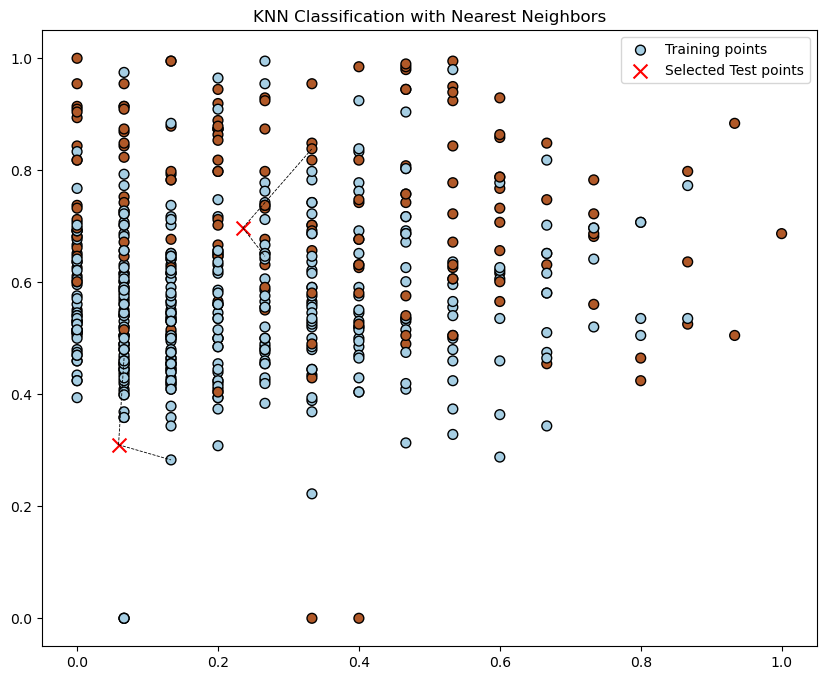

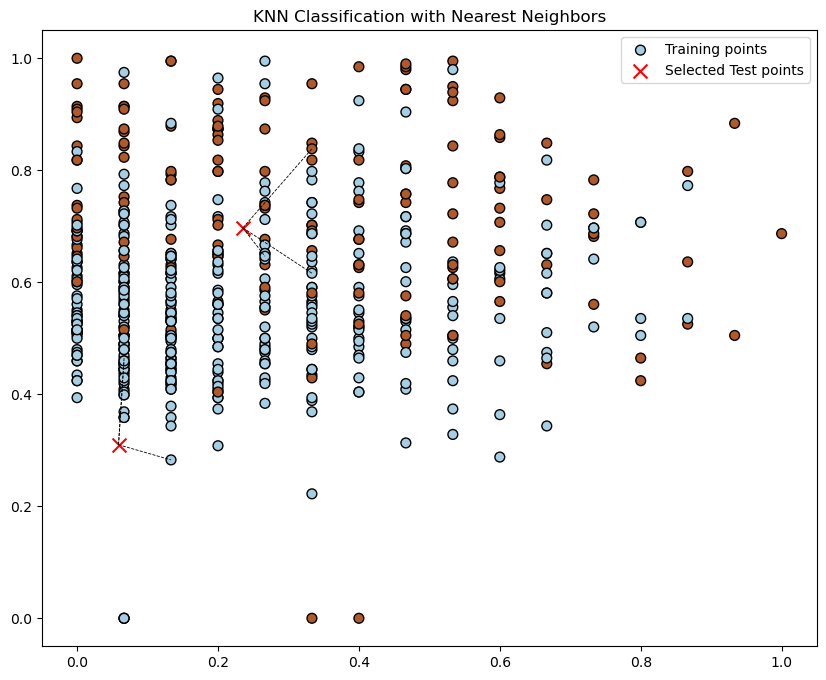

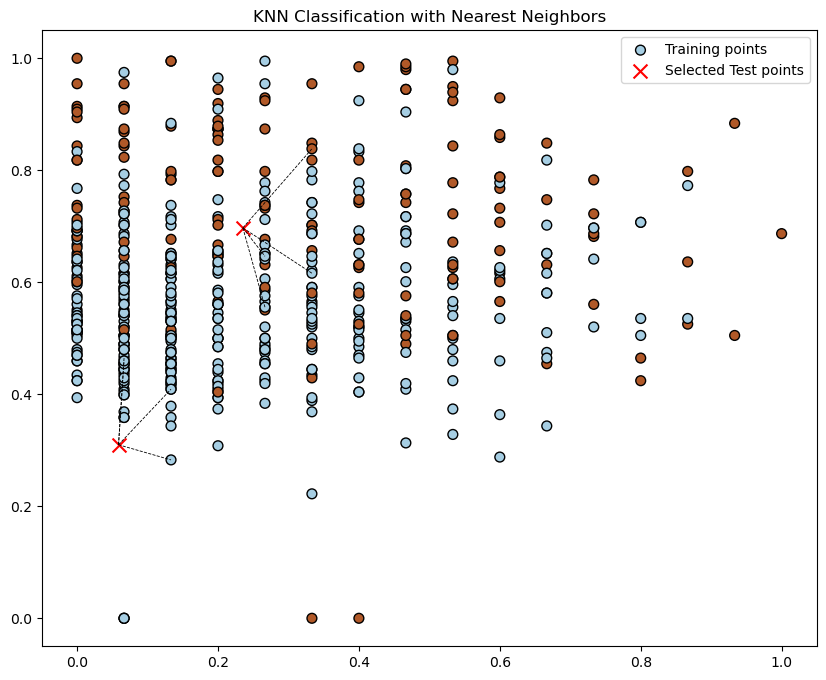

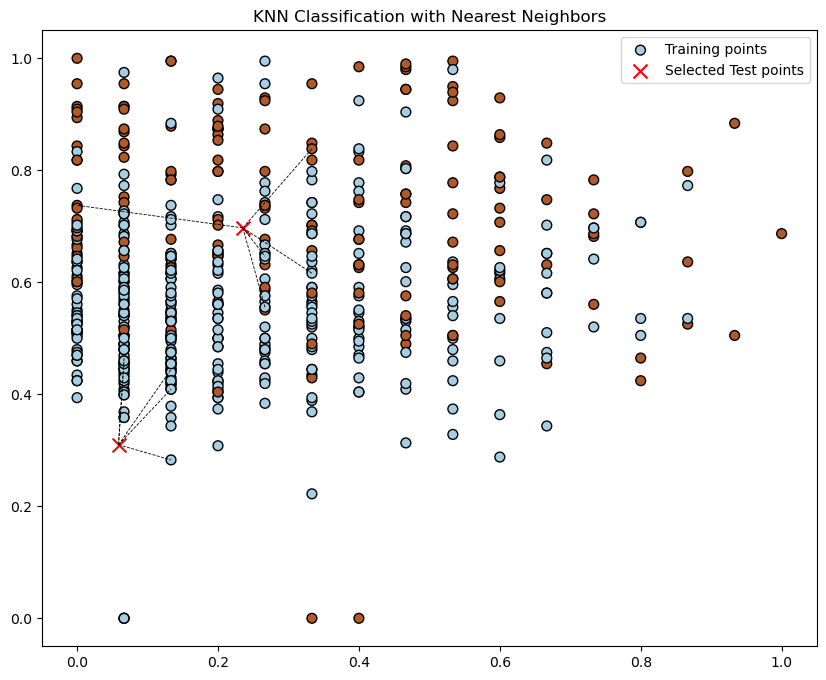

In [17]:
k_values = [2,3,4,5]
test_point_indices = [0, 1]
accuracy = []
for i in k_values:
    model = KNN(k = i)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    model.plot_knn(x_test, test_point_indices)
    correct,total = calculate_accuracy(y_test,predictions)
    model_accuaracy = correct / total
    accuracy.append({'accuracy':model_accuaracy,
                    'k': i,
                    'Total number of instances':total,
                    'Number of correctly classified instances':correct})

In [18]:
indx = 1
for item in accuracy:
    acc = item['accuracy'] * 100
    print(f"Model : {indx}")
    print(f"k value: {item['k']}")
    print(f"Number of correctly classified instances:  {item['Number of correctly classified instances']}")
    print(f"Total number of instances: {item['Total number of instances']}")
    print(f"Accuracy: {acc:.2f} %")
    indx += 1
    print("********************************")

Model : 1
k value: 2
Number of correctly classified instances:  144
Total number of instances: 231
Accuracy: 62.34 %
********************************
Model : 2
k value: 3
Number of correctly classified instances:  147
Total number of instances: 231
Accuracy: 63.64 %
********************************
Model : 3
k value: 4
Number of correctly classified instances:  150
Total number of instances: 231
Accuracy: 64.94 %
********************************
Model : 4
k value: 5
Number of correctly classified instances:  150
Total number of instances: 231
Accuracy: 64.94 %
********************************


In [19]:
sorted_accuracy = sorted(accuracy, key=lambda x: x['accuracy'], reverse=True)
avrg_accuracy = 0
for item in sorted_accuracy:
    item['accuracy'] = item['accuracy'] * 100
    avrg_accuracy += item['accuracy']
avrg_accuracy /= 4
print(f"Average Accuracy of all K values: {avrg_accuracy:.2f} %")

Average Accuracy of all K values: 63.96 %


In [20]:
answer = sorted_accuracy[0]
print("Best model:-")
print(f"k value: {answer['k']}")
print(f"Number of correctly classified instances:  {answer['Number of correctly classified instances']}")
print(f"Total number of instances: {answer['Total number of instances']}")
print(f"Accuracy: {answer['accuracy']:.2f} %")

Best model:-
k value: 4
Number of correctly classified instances:  150
Total number of instances: 231
Accuracy: 64.94 %


Problem (1) Decision Tree:-

In [21]:
drug_data = pd.read_csv('drug.csv')

In [22]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           198 non-null    object 
 3   Cholesterol  198 non-null    object 
 4   Na_to_K      199 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [23]:
missing_values= drug_data.isnull().sum()
missing_values

Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64

In [24]:
mean_Na_to_K= drug_data['Na_to_K'].mean()
drug_data['Na_to_K'].fillna(mean_Na_to_K, inplace=True)
drug_data['BP'].fillna(drug_data['BP'].mode()[0], inplace=True)  
drug_data['Cholesterol'].fillna(drug_data['Cholesterol'].mode()[0], inplace=True)

In [25]:
missing_values= drug_data.isnull().sum()
missing_values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [26]:
LE = LabelEncoder()
categorical_col=['Sex','BP','Cholesterol','Drug']
for col in categorical_col:
    drug_data[col] =LE.fit_transform( drug_data[col])

In [27]:
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355000,4
1,47,1,1,0,13.093000,2
2,47,1,1,0,10.114000,2
3,28,0,2,0,16.126126,3
4,61,0,1,0,18.043000,4


In [28]:
target_dt=drug_data['Drug']
feature_dt=drug_data.drop(['Drug'],axis=1)

In [29]:
accuracies = []
train_accuracies = []
tree_sizes = []

In the next cell we are comparing each each model's test accuracy with its trainning one.

In [30]:
for i in range(5):
    X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(feature_dt, target_dt, test_size=0.3, random_state=i)
    # Create Decision Tree Classifier with defined hyperparameters
    DT = DecisionTreeClassifier(random_state=0)
    DT.fit(X_train_dt, y_train_dt)
    
    accuracy = DT.score(X_test_dt, y_test_dt)
    accuracies.append(accuracy)
    
    train_accuracy = DT.score(X_train_dt, y_train_dt)
    train_accuracies.append(train_accuracy)
    
    tree_size = DT.tree_.node_count
    tree_sizes.append(tree_size)
    
    print(f"Experiment {i+1}: Test Accuracy = {accuracy:.4f}, Train Accuracy = {train_accuracy:.4f}, Tree Size = {tree_size:.4f}")

Experiment 1: Test Accuracy = 1.0000, Train Accuracy = 1.0000, Tree Size = 15.0000
Experiment 2: Test Accuracy = 0.9667, Train Accuracy = 1.0000, Tree Size = 15.0000
Experiment 3: Test Accuracy = 0.9833, Train Accuracy = 1.0000, Tree Size = 11.0000
Experiment 4: Test Accuracy = 0.9667, Train Accuracy = 1.0000, Tree Size = 11.0000
Experiment 5: Test Accuracy = 0.9667, Train Accuracy = 1.0000, Tree Size = 15.0000


In [31]:
best_accuracy = max(accuracies)
best_tree_size = tree_sizes[accuracies.index(best_accuracy)]
best_train_accuracy = train_accuracies[accuracies.index(best_accuracy)]

In [32]:
print(f"Best Test Accuracy: {best_accuracy:.4f}, Corresponding Train Accuracy: {best_train_accuracy:.4f}, Corresponding Tree Size: {best_tree_size:.4f}")

Best Test Accuracy: 1.0000, Corresponding Train Accuracy: 1.0000, Corresponding Tree Size: 15.0000


Although 'Experiment 1' has the best test accuracy at '1.0000', its tree has 15 levels which increases  the complexity of the model. On the other hand 'Experiment 3' has a pretty good test accuracy at '0.9833' and its tree has only 11 levels which will decrease the complixety of the model.

In conclusion 'Experiment 3' is a better model over all.

In [33]:
accuracies = []
tree_sizes = []
for i in range(5):
    X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(feature_dt,target_dt,test_size=0.3,random_state=i)
    DT = DecisionTreeClassifier(random_state=0)
    DT.fit(X_train_dt, y_train_dt)
    accuracy = DT.score(X_test_dt, y_test_dt)
    tree_size = DT.tree_.node_count
    accuracies.append(accuracy)
    tree_sizes.append(tree_size)
    print(f"Decision Tree {i+1}: Accuracy = {accuracy:.4f}, Tree Size = {tree_size:.4f}")

Decision Tree 1: Accuracy = 1.0000, Tree Size = 15.0000
Decision Tree 2: Accuracy = 0.9667, Tree Size = 15.0000
Decision Tree 3: Accuracy = 0.9833, Tree Size = 11.0000
Decision Tree 4: Accuracy = 0.9667, Tree Size = 11.0000
Decision Tree 5: Accuracy = 0.9667, Tree Size = 15.0000


In [34]:
def champion_model(accuracies, tree_sizes):
    best_size = float('inf') 
    best_accuracy = 0.0
    best_model = None

    for i in range(len(accuracies)):
        if tree_sizes[i] < best_size or (tree_sizes[i] == best_size and accuracies[i] > best_accuracy):
            best_size = tree_sizes[i]
            best_accuracy = accuracies[i]
            best_model = i

    return best_model, best_accuracy, best_size

In [35]:
# Usage
best_model_index, best_accuracy, best_size = champion_model(accuracies, tree_sizes)
print(f"The Champion Model:is Decision Tree {best_model_index + 1}, Accuracy = {best_accuracy:.4f}, Tree Size = {best_size:.4f}")

The Champion Model:is Decision Tree 3, Accuracy = 0.9833, Tree Size = 11.0000


In [36]:
# Initialize lists to store statistics
train_sizes = [0.3, 0.4, 0.5, 0.6, 0.7]
mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

In [37]:
# Perform experiments for different train-test split ratios
for size in train_sizes:
    accuracies = []
    tree_sizes = []
    for i in range(5):
        X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(feature_dt, target_dt, test_size=(1 - size), random_state=i)
        DT = DecisionTreeClassifier(random_state=0)
        DT.fit(X_train_dt, y_train_dt)
        accuracy = DT.score(X_test_dt, y_test_dt)
        tree_size = DT.tree_.node_count
        accuracies.append(accuracy)
        tree_sizes.append(tree_size)
    # Calculate statistics
    mean_accuracies.append(np.mean(accuracies))
    max_accuracies.append(np.max(accuracies))
    min_accuracies.append(np.min(accuracies))
    mean_tree_sizes.append(np.mean(tree_sizes))
    max_tree_sizes.append(np.max(tree_sizes))
    min_tree_sizes.append(np.min(tree_sizes))

    # Print statistics for each experiment
    print(f"Training Set Size: {size * 100}%")
    print(f"Mean Accuracy: {np.mean(accuracies):.4f}, Max Accuracy: {np.max(accuracies):.4f}, Min Accuracy: {np.min(accuracies):.4f}")
    print(f"Mean Tree Size: {np.mean(tree_sizes):.4f}, Max Tree Size: {np.max(tree_sizes):.4f}, Min Tree Size: {np.min(tree_sizes):.4f}")

Training Set Size: 30.0%
Mean Accuracy: 0.9686, Max Accuracy: 0.9857, Min Accuracy: 0.9357
Mean Tree Size: 13.0000, Max Tree Size: 17.0000, Min Tree Size: 11.0000
Training Set Size: 40.0%
Mean Accuracy: 0.9750, Max Accuracy: 0.9833, Min Accuracy: 0.9667
Mean Tree Size: 13.4000, Max Tree Size: 15.0000, Min Tree Size: 11.0000
Training Set Size: 50.0%
Mean Accuracy: 0.9760, Max Accuracy: 0.9900, Min Accuracy: 0.9600
Mean Tree Size: 13.4000, Max Tree Size: 15.0000, Min Tree Size: 11.0000
Training Set Size: 60.0%
Mean Accuracy: 0.9800, Max Accuracy: 0.9875, Min Accuracy: 0.9750
Mean Tree Size: 13.4000, Max Tree Size: 15.0000, Min Tree Size: 11.0000
Training Set Size: 70.0%
Mean Accuracy: 0.9770, Max Accuracy: 1.0000, Min Accuracy: 0.9672
Mean Tree Size: 13.4000, Max Tree Size: 15.0000, Min Tree Size: 11.0000


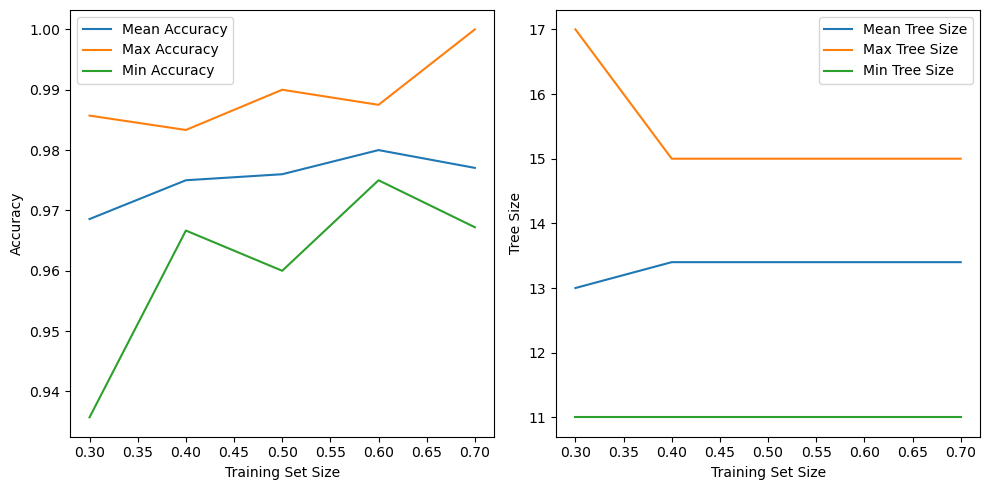

In [38]:
# Generate plots for accuracy vs. training set size and tree size vs. training set size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, mean_accuracies, label='Mean Accuracy')
plt.plot(train_sizes, max_accuracies, label='Max Accuracy')
plt.plot(train_sizes, min_accuracies, label='Min Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, mean_tree_sizes, label='Mean Tree Size')
plt.plot(train_sizes, max_tree_sizes, label='Max Tree Size')
plt.plot(train_sizes, min_tree_sizes, label='Min Tree Size')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()

plt.tight_layout()
plt.show()